# Lab 01: MNIST Multi-Layer - Demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/mnist"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

### Make a two layer net class

In [3]:
class two_layer_net(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(two_layer_net, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size, bias=False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
        
    def forward(self, x):
        y = self.layer1(x)
        y_hat = F.relu(y)
        scores = self.layer2(y_hat)
        return scores

### Build the net (recall that a one layer net had 7,840 parameters)

In [4]:
net = two_layer_net(784, 50, 10)
print(net)

two_layer_net(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=10, bias=False)
)


In [5]:
utils.display_num_param(net)

There are 39700 (0.04 million) parameters in this neural network


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

bs = 20

### Evaluate on test set

In [7]:
def eval_on_test_set():
    
    running_error = 0
    num_batches = 0
    
    for i in range(0, 10000, bs):
        minibatch_data = test_data[i : i+bs]
        minibatch_labels = test_label[i : i+bs]
        
        inputs = minibatch_data.view(bs, -1)
        scores = net(inputs)
        
        error = utils.get_error(scores, minibatch_labels)
        running_error += error.item()
        num_batches += 1
    
    total_error = running_error / num_batches
    print("Error rate on test set: {}%".format(total_error*100))

### Training loop

In [8]:
start = time.time()

lr = 0.05 # initial learning rate

for epoch in range(200):
    
    # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    if epoch % 10 == 0:
        lr = lr / 1.5
        
    # create a new optimizer at the beginning of each epoch: give the current learning rate
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for i in range(0, 60000, bs):
        
        # forward and backward pass
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, -1)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()
        
        # compute some stats
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_labels)
        running_error += error
        num_batches += 1
        
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set 
    if epoch % 10 == 0:
        print(" ")
        print("Epoch: {}, Time: {}, Loss: {}, Error: {}%, lr: {}".format(
            epoch, elapsed_time, total_loss, total_error*100, lr))
        

 
Epoch: 0, Time: 1.6465659141540527, Loss: 0.43768030434971056, Error: 11.834939956665039%, lr: 0.03333333333333333
 
Epoch: 10, Time: 18.336255073547363, Loss: 0.07263785636108756, Error: 2.024982452392578%, lr: 0.022222222222222223
 
Epoch: 20, Time: 35.507450103759766, Loss: 0.04492255114922106, Error: 1.178327202796936%, lr: 0.014814814814814815
 
Epoch: 30, Time: 53.75893306732178, Loss: 0.033806897765365045, Error: 0.8199977874755859%, lr: 0.009876543209876543
 
Epoch: 40, Time: 71.86100888252258, Loss: 0.028067953595052434, Error: 0.5850008130073547%, lr: 0.006584362139917695
 
Epoch: 50, Time: 92.1062421798706, Loss: 0.024845822861835284, Error: 0.48000115156173706%, lr: 0.0043895747599451305
 
Epoch: 60, Time: 110.49880003929138, Loss: 0.022941505554384397, Error: 0.4050008952617645%, lr: 0.0029263831732967535
 
Epoch: 70, Time: 127.49697518348694, Loss: 0.02177115307309335, Error: 0.36000072956085205%, lr: 0.001950922115531169
 
Epoch: 80, Time: 145.5133011341095, Loss: 0.02

### Choose image at random from the test set and see how good/bad are the predictions

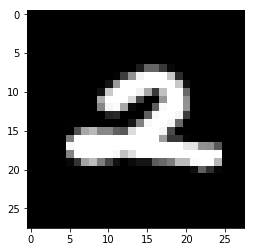

In [9]:
idx = randint(0, 10000-1)
im = test_data[idx]

utils.show(im)

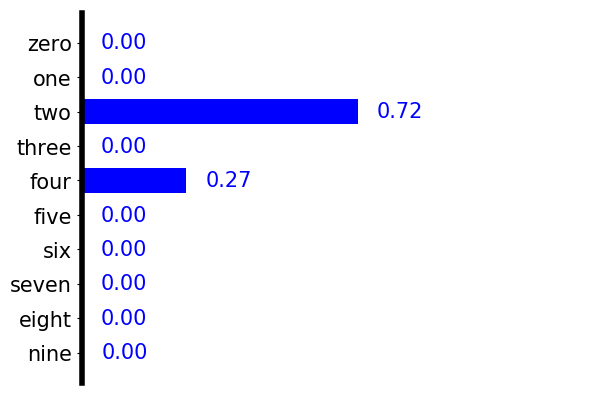

In [10]:
scores = net(im.view(1, -1))
probs = F.softmax(scores, dim=1)

utils.show_prob_mnist(probs)

In [11]:
test_label[idx]

tensor(2)